## Caso 1

In [ ]:
import requests

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
url = "https://www.gutenberg.org/cache/epub/58221/pg58221-images.html"

In [ ]:
contenido = requests.get(url).text

In [ ]:
print(type(contenido))

<class 'str'>


In [ ]:
soup = BeautifulSoup(contenido, "html.parser")

In [ ]:
h1 = soup.find_all("h1")

In [ ]:
print(h1)

[<h1 class="g1 ws1">LA ODISEA</h1>]


In [ ]:
italicas = soup.find_all("i")

In [ ]:
print(italicas)

[<i>Ilíada</i>, <i>Odisea</i>, <i>Odisea</i>, <i>Ilíada</i>, <i>in medias res, non secus
ac notas, auditorem rapit</i>, <i>Odisea</i>, <i>Ilíada</i>, <i>De
lo sublime</i>, <i>Odisea</i>, <i>Ilíada</i>, <i>Odisea</i>, <i>Odisea</i>, <i>Ilíada</i>, <i>Ilíada</i>, <i>Odisea</i>, <i>folk-lore</i>, <i>Odisea</i>, <i>Ilíada</i>, <i>Odisea</i>, <i>la sacra potestad
de Alcínoo</i>, <i>Ilíada</i>, <i>bracinívea</i>, <i>ojilúcida</i>, <i>argentípeda</i>, <i>Teogonía</i>, <i>Ilíada</i>, <i>Bibliotheca scriptorum Graecorum et
Romanorum Teubneriana</i>, <i>Lexicon Homericum</i>, <i>Diccionario de
Autoridades</i>, <i>Ilíada</i>, <i>Odisea</i>, <i>Odisea</i>, <i>Ilíada</i>, <i>Odisea</i>, <i>Odisea</i>, <i>Odisea</i>, <i>Viaje de Telémaco</i>, <i>Regreso de Ulises</i>, <i>Odisea</i>, <i>Ilíada</i>, <i>Ilíada</i>, <i>Odisea</i>, <i>Odisea</i>, <i>Hermosilla y su Ilíada</i>, <i>y si no sé el griego</i>, <i>el griego de Homero, que no es una lengua general, sino
una de sus cuatro distintos dialectos, na

In [ ]:
from collections import Counter

In [ ]:
parrafos = str(soup.find_all("p"))

In [ ]:
print(parrafos.count("Ulises"))
print(parrafos.count("Ciclope"))
print(parrafos.count("Minerva"))

1662
65
366


In [ ]:
# Funcion para buscar palabras
def buscar_palabra(palabra):
  ocurrencias = str(soup).lower().count(palabra.lower())
  print(f"Encontraste la plabra '{palabra}' {ocurrencias} veces")

In [ ]:
buscar_palabra("Ulises")

Encontraste la plabra 'Ulises' 1708 veces


In [ ]:
import random

In [ ]:
parrafo = soup.find_all("p")
parrafo_aleatorio = random.choice(parrafo).text.strip()

In [ ]:
print(parrafo_aleatorio)

69 «Ésta es la ocasión más
oportuna para interrogar á los huéspedes é inquirir quiénes son,
ahora que se han saciado de comida: ¡Forasteros! ¿Quiénes sois?
¿De dónde llegasteis, navegando por los húmedos caminos? ¿Venís por
algún negocio ó andáis por el mar, á la ventura, como los piratas
que divagan, exponiendo su vida y produciendo daño á los hombres de
extrañas tierras?»


In [ ]:
print(len(parrafo_aleatorio.split()))

63


In [ ]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import nltk
from nltk.corpus import stopwords
import re

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Descarga corpus de stopwords en español
nltk.download('stopwords')
stopwords_es = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Funcion para limpiar texto

def limpiar_texto(texto):

  texto_minuscula = texto.lower() # convierte todo el texto en minusculas

  texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minuscula) # elimina todos los signos de puntuacion

  lista_palabras = texto_sin_puntuacion.split() # divide el texto en palabras individuales

  palabras_importantes = [] # crea lista de palabras importantes

  for palabra in lista_palabras:
    if palabra not in stopwords_es:
      palabras_importantes.append(palabra)

  return palabras_importantes

In [ ]:
texto_completo = soup.get_text()

palabras_limpias = limpiar_texto(texto_completo)

texto_limpio = ' '.join(palabras_limpias)

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_limpio)

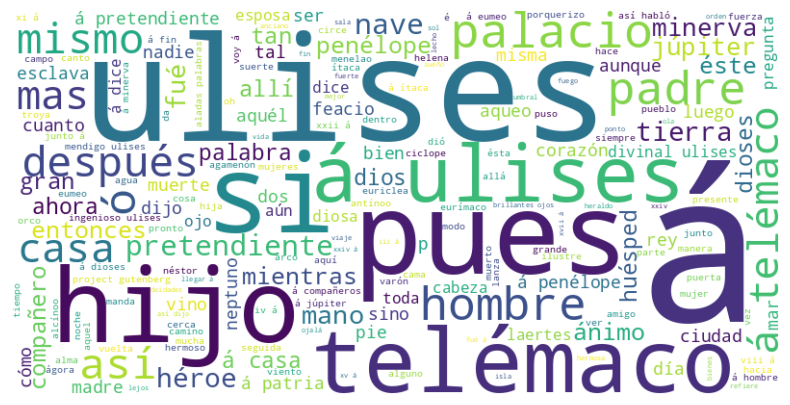

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
colores_personalizados = ['#FF0000', '#00FF00', '#0000FF']  # Rojo, verde, azul
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=lambda word, font_size, position, orientation, random_state=None, **kwargs: random.choice(colores_personalizados)).generate(texto_limpio)

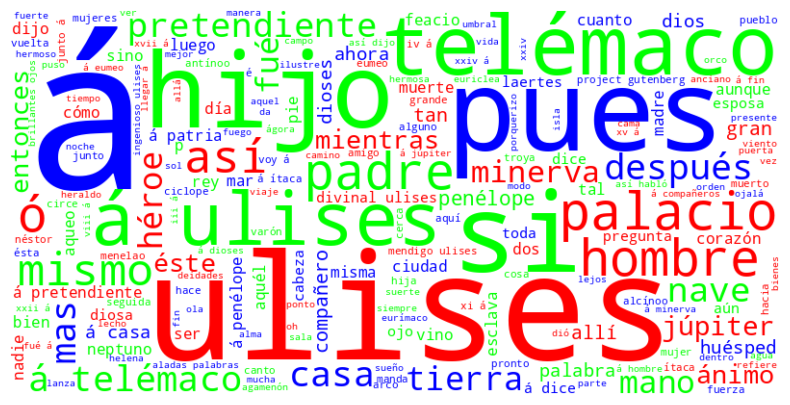

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Funcion para limpiar texto

def limpiar_texto(texto):

# Lista de palabras a eliminar

  palabras_a_eliminar = ['dijo', 'así', 'aunque', 'sino', 'luego', 'pues', 'mientras',
        'después', 'antes', 'porque', 'cuando', 'cómo', 'donde', 'cap',
        'capítulo', 'verso', 'canto', 'á', 'ó', 'si']

# Añexa las palabras que quiero eliminar a las stopwords

  black_list = stopwords_es.union(palabras_a_eliminar)

  texto_minuscula = texto.lower() # convierte todo el texto en minusculas

  texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minuscula) # elimina todos los signos de puntuacion

  lista_palabras = texto_sin_puntuacion.split() # divide el texto en palabras individuales

  palabras_importantes = [] # crea lista de palabras importantes

  for palabra in lista_palabras:
    if palabra not in black_list:
      palabras_importantes.append(palabra)

  return palabras_importantes

In [ ]:
texto_completo = soup.get_text()

palabras_limpias = limpiar_texto(texto_completo)

texto_limpio = ' '.join(palabras_limpias)

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap = "inferno").generate(texto_limpio)

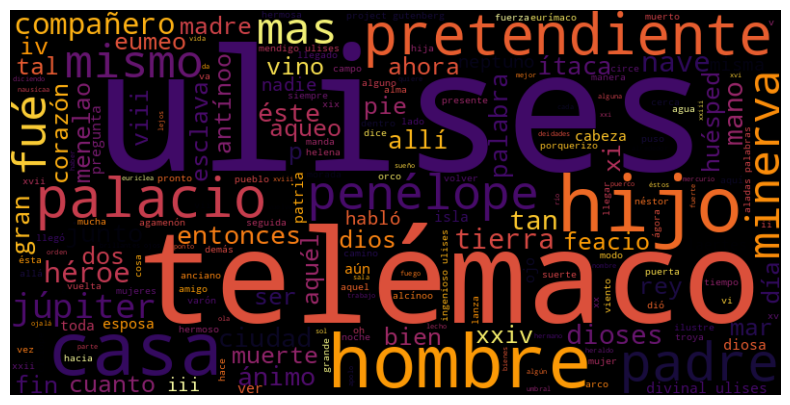

In [ ]:
plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Caso 2

Defino la URL

In [ ]:
url_2 = "https://stackoverflow.com/questions/415511/how-to-get-the-current-time-in-python"

Trae el contenido de la URL

In [ ]:
pagina = requests.get(url_2)

In [ ]:
contenido = pagina.text

Creo el objeto soup

In [ ]:
soup = BeautifulSoup(contenido, "html.parser")

In [ ]:
pregunta = soup.find("div", {"class": "question"})
texto_pregunta = pregunta.find("div", {"class": "s-prose js-post-body"})

In [ ]:
print(texto_pregunta.get_text().strip())

How do I get the current time in Python?


In [ ]:
respuesta = soup.find("div", {"class": "answer"})
texto_respuesta = respuesta.find("div", {"class": "s-prose js-post-body"})
print(texto_respuesta.get_text().strip())

Use datetime:
>>> import datetime
>>> now = datetime.datetime.now()
>>> now
datetime.datetime(2009, 1, 6, 15, 8, 24, 78915)
>>> print(now)
2009-01-06 15:08:24.789150

For just the clock time without the date:
>>> now.time()
datetime.time(15, 8, 24, 78915)
>>> print(now.time())
15:08:24.789150


To save typing, you can import the datetime object from the datetime module:
>>> from datetime import datetime

Then remove the prefix datetime. from all of the above.
